In [1]:
import pandas as pd 

In [2]:
train = pd.read_csv("kaggle/input/home-data-for-ml-course/train.csv")
test_df = pd.read_csv("kaggle/input/home-data-for-ml-course//test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
SalePrice = train['SalePrice']
train_df = train.drop(['SalePrice'], axis=1)

In [7]:
train_idx = train['Id']
test_idx = test_df['Id']

In [8]:
combined = pd.concat([train_df, test_df]).reset_index(drop=True)
combined.shape

(2919, 80)

In [9]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [10]:
combined.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# clean Null values

In [11]:
# show how much null value each column has
nulls = combined.isnull().sum()
nulls = nulls[nulls > 0]
nulls = nulls.sort_values(ascending=False)
print(len(nulls))
nulls

34


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [12]:
len(combined[nulls.keys()].columns.to_list())

34

In [13]:
combined[nulls.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        10 non-null     object 
 1   MiscFeature   105 non-null    object 
 2   Alley         198 non-null    object 
 3   Fence         571 non-null    object 
 4   MasVnrType    1153 non-null   object 
 5   FireplaceQu   1499 non-null   object 
 6   LotFrontage   2433 non-null   float64
 7   GarageFinish  2760 non-null   object 
 8   GarageQual    2760 non-null   object 
 9   GarageCond    2760 non-null   object 
 10  GarageYrBlt   2760 non-null   float64
 11  GarageType    2762 non-null   object 
 12  BsmtExposure  2837 non-null   object 
 13  BsmtCond      2837 non-null   object 
 14  BsmtQual      2838 non-null   object 
 15  BsmtFinType2  2839 non-null   object 
 16  BsmtFinType1  2840 non-null   object 
 17  MasVnrArea    2896 non-null   float64
 18  MSZoning      2915 non-null 

In [14]:
# based on the data description, these columns with NaN values are actually not missing data, they are just not available in the house
has_nan =['Alley',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscFeature',
'MasVnrType']
# so we can fill them with 'None'
combined[has_nan] = combined[has_nan].fillna('None')

In [15]:
# show how much null value each column has
nulls = combined.isnull().sum()
nulls = nulls[nulls > 0]
nulls = nulls.sort_values(ascending=False)
print(len(nulls))
nulls

19


LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
MSZoning          4
BsmtFullBath      2
Utilities         2
Functional        2
BsmtHalfBath      2
GarageArea        1
GarageCars        1
KitchenQual       1
TotalBsmtSF       1
Electrical        1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64

In [16]:
# the GarageYrBlt rely in if there is a garage or not, so we can fill them with 0
combined['GarageYrBlt'] = combined['GarageYrBlt'].fillna(0)

<Axes: ylabel='Frequency'>

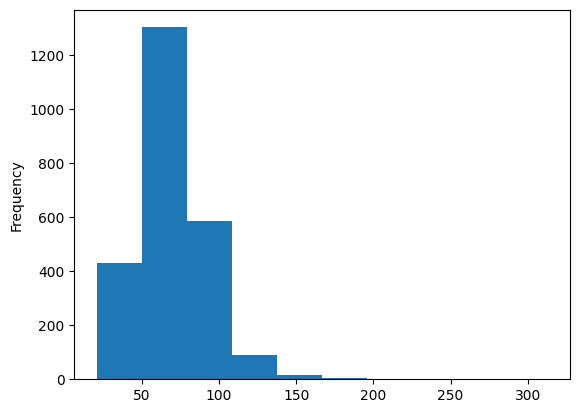

In [17]:
# LotFrontage
combined['LotFrontage'].plot(kind='hist')

In [18]:
# fill LotFrontage with the median of the neighborhood
combined['LotFrontage'] = combined.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [19]:
# what type of MasVnrType the missing MasVnrArea has
combined[combined['MasVnrArea'].isnull()]['MasVnrType'].value_counts()

MasVnrType
None    23
Name: count, dtype: int64

In [20]:
# fill MasVnrArea with 0
combined['MasVnrArea'] = combined['MasVnrArea'].fillna(0)

In [21]:
combined[combined['MSZoning'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1915,1916,30,NaN,109.0,21780,Grvl,None,Reg,Lvl,NaN,...,0,0,None,None,None,0,3,2009,ConLD,Normal
2216,2217,20,NaN,80.0,14584,Pave,None,Reg,Low,AllPub,...,0,0,None,None,None,0,2,2008,WD,Abnorml
2250,2251,70,NaN,60.0,56600,Pave,None,IR1,Low,AllPub,...,0,0,None,None,None,0,1,2008,WD,Normal
2904,2905,20,NaN,125.0,31250,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2006,WD,Normal


In [22]:
# fill MSZoning with the mode of the neighborhood
combined['MSZoning'] = combined.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [23]:
# check the null rows of the columns
bsmnt = ['BsmtFullBath' , 'BsmtHalfBath','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

combined[combined['BsmtFullBath'].isnull()][bsmnt + ['BsmtQual']]

,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtQual
2120,NaN,NaN,NaN,NaN,NaN,NaN,None
2188,NaN,NaN,0.0,0.0,0.0,0.0,None


In [24]:
# all the missing values in the basement columns are because there is no basement, so we can fill them with 0
combined[bsmnt] = combined[bsmnt].fillna(0)

In [25]:
# check the null rows of the columns
garage = ['GarageCars', 'GarageArea']

combined[combined['GarageCars'].isnull()][garage + ['GarageType', 'GarageQual']]

,GarageCars,GarageArea,GarageType,GarageQual
2576,NaN,NaN,Detchd,None


In [26]:
# all the missing values in the garage columns are because there is no garage, so we can fill them with 0
combined[garage] = combined[garage].fillna(0)

In [27]:
# fill the rest of the columns with the mode
combined = combined.fillna(combined.mode().iloc[0])

In [28]:
# show how much null value each column has
nulls = combined.isnull().sum()
nulls = nulls[nulls > 0]
nulls = nulls.sort_values(ascending=False)
print(len(nulls))
nulls

0


Series([], dtype: int64)

# Data preprocessing

In [29]:
combined.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [30]:
# object columns
obj_cols = combined.select_dtypes(include='object').columns.to_list()
print(len(obj_cols))
obj_cols

43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [31]:
# catigorical columns with ordering
ranked_col = [
    "Utilities",
    "OverallQual",
    "OverallCond",
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence",
    "Alley",
    "LandSlope",
]
# Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ranked_col:
    combined[col] = le.fit_transform(combined[col])

In [32]:
# one hot encoding for the rest of the object columns
combined = pd.get_dummies(combined)

In [33]:
# object columns
obj_cols = combined.select_dtypes(include='object').columns.to_list()
print(len(obj_cols))
obj_cols

0


[]

In [34]:
combined.shape

(2919, 227)

In [35]:
combined.head()

,Id,MSSubClass,LotFrontage,LotArea,Alley,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,0,0,6,4,2003,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,1,0,0,5,7,1976,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,1,0,0,6,4,2001,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,1,0,0,6,4,1915,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,1,0,0,7,4,2000,...,False,False,False,True,False,False,False,False,True,False


# model building

In [36]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler

X = combined.loc[train_idx].values
y = SalePrice.values


scaler = MinMaxScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

8377439472.125846


In [38]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)


4.115820086480808e+29


In [39]:
# SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

7861884732.367065


In [40]:
# KNeighbors
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

9245535656.135069


In [41]:
# DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

14780650059.150684


In [42]:
# GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

7923262423.764245


In [46]:
test_idx

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [45]:
test = combined.loc[test_idx].values
gbr = GradientBoostingRegressor()
gbr.fit(X, y)


test_predictions = rf.predict(test)
test_df['SalePrice'] = test_predictions
test_df[['Id', 'SalePrice']].to_csv('/baseline.csv', index=False)

KeyError: '[2919] not in index'

In [ ]:
# AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
y_pred = abr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

10949337522.274174
